# Data Preparation

In [1]:
import sys
import os
import pandas as pd
import re
import matplotlib.pyplot as plt


from clean_tweets_dataframe import Clean_Tweets

In [2]:
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
csv_path = "processed_tweet_data.csv"
cleand_csv = "clean_processed_tweet_data.csv"

In [4]:
df = pd.read_csv(csv_path)
print("file read as csv")

file read as csv


In [5]:
df2 = pd.read_csv(cleand_csv)
print("file read as cleaned_csv")

file read as cleaned_csv


# Pre-processing

In [6]:
def get_data_info(tweet_df: pd.DataFrame):
    
    row_count, col_count = tweet_df.shape
    
    print(f"Number of rows: {row_count}")
    print(f"Number of columns: {col_count}")

    return tweet_df.info()

In [7]:

get_data_info(df)

Number of rows: 24625
Number of columns: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24625 entries, 0 to 24624
Data columns (total 15 columns):
created_at            24625 non-null object
source                24625 non-null object
original_text         24625 non-null object
polarity              24625 non-null float64
subjectivity          24625 non-null float64
favorite_count        0 non-null float64
retweet_count         24625 non-null int64
lang                  0 non-null float64
original_author       24625 non-null object
followers_count       24625 non-null int64
friends_count         24625 non-null int64
possibly_sensitive    9975 non-null object
hashtags              24625 non-null object
user_mentions         24625 non-null object
location              15731 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 2.8+ MB


In [8]:
df

,created_at,source,original_text,polarity,subjectivity,favorite_count,retweet_count,lang,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,location
0,Fri Apr 22 22:20:18 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0,0.0,NaN,355,NaN,McMc74078966,3,12,NaN,[],"[{'screen_name': 'nikitheblogger', 'name': 'Ne...",NaN
1,Fri Apr 22 22:19:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0,0.0,NaN,505,NaN,McMc74078966,3,12,NaN,[],"[{'screen_name': 'sagt_mit', 'name': 'Sie sagt...",NaN
2,Fri Apr 22 22:17:28 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0,0.0,NaN,4,NaN,McMc74078966,3,12,NaN,[],"[{'screen_name': 'Kryptonoun', 'name': 'Krypto...",NaN
3,Fri Apr 22 22:17:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @WRi007: Die #Deutschen sind ein braves Vol...,0.0,0.0,NaN,332,NaN,McMc74078966,3,12,NaN,"[{'text': 'Deutschen', 'indices': [16, 26]}, {...","[{'screen_name': 'WRi007', 'name': 'Wolfgang B...",NaN
4,Fri Apr 22 22:13:15 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @RolandTichy: Baerbock verkündet mal so neb...,0.0,0.0,NaN,386,NaN,McMc74078966,3,12,NaN,[],"[{'screen_name': 'RolandTichy', 'name': 'Rolan...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24620,Fri Apr 22 14:44:56 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @waglenikhil: आपल्या घरातल्या कोणत्याही कार...,0.0,0.0,NaN,242,NaN,kitukalesatya,706,643,NaN,[],"[{'screen_name': 'waglenikhil', 'name': 'nikhi...",NaN
24621,Fri Apr 22 14:44:44 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @yadavtejashwi: चौहरमल नगर, फुलवारी शरीफ मे...",0.0,0.0,NaN,242,NaN,kitukalesatya,706,643,NaN,[],"[{'screen_name': 'yadavtejashwi', 'name': 'Tej...",NaN
24622,Fri Apr 22 14:44:35 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @Parthtiwari25: Gujarat Congress MLA arrest...,0.0,0.0,NaN,203,NaN,kitukalesatya,706,643,NaN,[],"[{'screen_name': 'Parthtiwari25', 'name': 'Par...",NaN
24623,Fri Apr 22 14:44:08 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @news24tvchannel: CM नीतीश कुमार ने तेजस्वी...,0.0,0.0,NaN,301,NaN,kitukalesatya,706,643,NaN,[],"[{'screen_name': 'news24tvchannel', 'name': 'N...",NaN


In [5]:
class TweeterDataExplorator:
    
    def __init__(self, df):
        
        self.df = df
    
    def read_head(self):
        return self.df.head()
    
    def get_info(self):
        row_count, col_count = self.df.shape
    
        print(f"Number of rows: {row_count}")
        print(f"Number of columns: {col_count}")

        return (row_count, col_count), self.df.info()
    
    def get_count(self, column_name):
        return self.df[column_name].value_counts()
    
    def get_polarities_count(self):
        postive_count = df[df['polarity'] > 0.0].shape[0]
        neutral_count = df[df['polarity'] == 0.0].shape[0]
        negative_count = df[df['polarity'] < 0.0].shape[0]
        
        return {"postive": postive_count, "neutral": neutral_count, "negative": negative_count}

    def get_hash_tag_df(self):        
        hash_tags = self.df.original_text.apply(self.__find_hashtags)
        
        flattened_hash_tags = []
        
        for hash_tag_list in hash_tags:
            for hash_tag in hash_tag_list:
                flattened_hash_tags.append(hash_tag)
        
        hashtag_df = pd.DataFrame(columns=['hashtag'])
        hashtag_df['hashtag'] = flattened_hash_tags
        
        return hashtag_df
    
    def most_used_hash_tag(self, top=None):
        return self.get_hash_tag_df()['hashtag'].value_counts().head(top)
        
    
    def most_used_language(self, top=None):
        return self.df['lang'].value_counts().head(top)
    
    def authors(self, top=None):
        
        return self.df['original_author'].value_counts().head(top)
    
    
    def most_tweeted_country(self, top=None):
        return self.df['location'].value_counts().head(top)
    
    def __find_hashtags(self, tweet):
        
        try:
            return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
        except:
            return []

In [9]:
tweeterDataExplorator = TweeterDataExplorator(df)

In [11]:
tweeterDataExplorator.read_head()

,created_at,source,original_text,polarity,subjectivity,favorite_count,retweet_count,lang,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,location
0,Fri Apr 22 22:20:18 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0,0.0,NaN,355,NaN,McMc74078966,3,12,NaN,[],"[{'screen_name': 'nikitheblogger', 'name': 'Ne...",NaN
1,Fri Apr 22 22:19:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0,0.0,NaN,505,NaN,McMc74078966,3,12,NaN,[],"[{'screen_name': 'sagt_mit', 'name': 'Sie sagt...",NaN
2,Fri Apr 22 22:17:28 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0,0.0,NaN,4,NaN,McMc74078966,3,12,NaN,[],"[{'screen_name': 'Kryptonoun', 'name': 'Krypto...",NaN
3,Fri Apr 22 22:17:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @WRi007: Die #Deutschen sind ein braves Vol...,0.0,0.0,NaN,332,NaN,McMc74078966,3,12,NaN,"[{'text': 'Deutschen', 'indices': [16, 26]}, {...","[{'screen_name': 'WRi007', 'name': 'Wolfgang B...",NaN
4,Fri Apr 22 22:13:15 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @RolandTichy: Baerbock verkündet mal so neb...,0.0,0.0,NaN,386,NaN,McMc74078966,3,12,NaN,[],"[{'screen_name': 'RolandTichy', 'name': 'Rolan...",NaN


In [12]:
tweeterDataExplorator.get_info()

Number of rows: 24625
Number of columns: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24625 entries, 0 to 24624
Data columns (total 15 columns):
created_at            24625 non-null object
source                24625 non-null object
original_text         24625 non-null object
polarity              24625 non-null float64
subjectivity          24625 non-null float64
favorite_count        0 non-null float64
retweet_count         24625 non-null int64
lang                  0 non-null float64
original_author       24625 non-null object
followers_count       24625 non-null int64
friends_count         24625 non-null int64
possibly_sensitive    9975 non-null object
hashtags              24625 non-null object
user_mentions         24625 non-null object
location              15731 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 2.8+ MB


((24625, 15), None)

In [13]:
tweeterDataExplorator.get_count("favorite_count")

Series([], Name: favorite_count, dtype: int64)

In [19]:
tweeterDataExplorator.most_used_hash_tag()

#MarvinInu       340
#inflation       202
#Ukraine         190
#SriLanka        143
#gold            121
                ... 
#angelbroking      1
#TamilCinema       1
#IVEfanart         1
#Ukriane           1
#cctv              1
Name: hashtag, Length: 6386, dtype: int64

In [14]:
 tweeterDataExplorator.most_tweeted_country()

India                  850
Sri Lanka              350
United States          300
New Delhi              300
Hyderabad, India       250
                      ... 
Jhargram, India         50
Nashik, India           50
Holmby Hills            50
Deutschland             50
the doomed dominion     50
Name: location, Length: 234, dtype: int64

In [15]:
polaritites_count = tweeterDataExplorator.get_polarities_count()
print(f"postive: { polaritites_count['postive'] }")
print(f"negative: { polaritites_count['negative'] }")
print(f"neutal: { polaritites_count['neutral'] }")

postive: 6506
negative: 2828
neutal: 15291


In [10]:
top_ten_hash_tags_used = tweeterDataExplorator.most_used_hash_tag(10)
top_ten_hash_tags_used

#MarvinInu         340
#inflation         202
#Ukraine           190
#SriLanka          143
#gold              121
#Marvin            115
#lka               107
#India             102
#PNPKakampiMo       94
#MamataBanerjee     90
Name: hashtag, dtype: int64

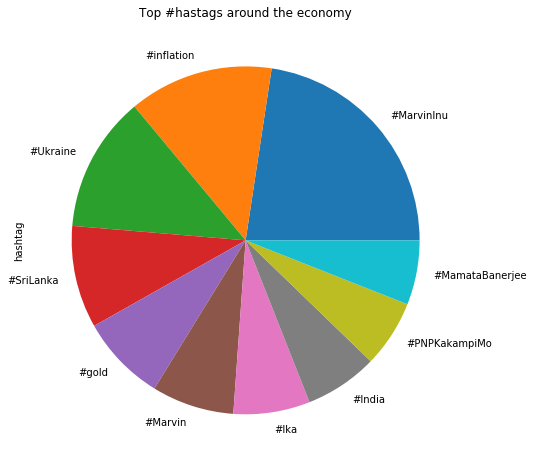

In [12]:
top_ten_hash_tags_used.plot(kind="pie", title="Top #hastags around the economy", figsize=[8, 8])